# Wine Quality Prediction

We are using Kaggle’s Red Wine Quality dataset or the dataset was already mentioned in the assignment email to build various classification models to predict whether a particular red wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7). The quality of a wine is determined by 11 input variables:
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulfates
11. Alcohol

# Objectives

The objectives of this project are as follows:

=> To determine which features are the most indicative of a good quality wine

=> To experiment with different machine learning algorithm to see which yields the highest accuracy

# Dataset Description

You can see that several features will be used to classify the quality of wine, many of them are chemical, so we need to have a basic understanding of such chemicals

* volatile acidity :   Volatile acidity is the gaseous acids present in wine.
* fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
* residual sugar :   Amount of sugar left after fermentation.
* citric acid :    It is weak organic acid, found in citrus fruits naturally.
* chlorides :   Amount of salt present in wine.
* free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
* total sulfur dioxide 
* pH :   In wine pH is used for checking acidity
* density : Depends on the alcohol and sugar content. Better wines usually have lower densities.
* sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
* alcohol :   Percent of alcohol present in wine.

## Importing Libraries

In [1]:
# Import required libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Loading wine quality dataset
df=pd.read_csv('Wine-Quality-Dataset.csv')
print('(Rows, Columns):',str(df.shape))

(Rows, Columns): (1599, 12)


In [3]:
# Check starting 5 rows
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Exploratory Data Analysis

In [4]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

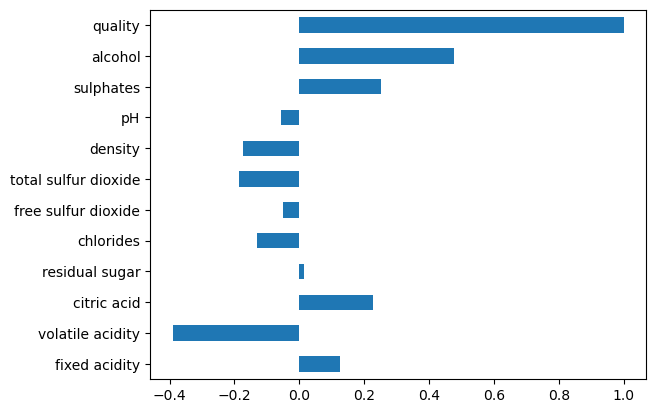

In [7]:
# Checking correlation with quality
df.corr()['quality'].plot(kind='barh')

In [8]:
# Viualization of Quality feature
fig=px.histogram(df,x='quality')
fig.show()

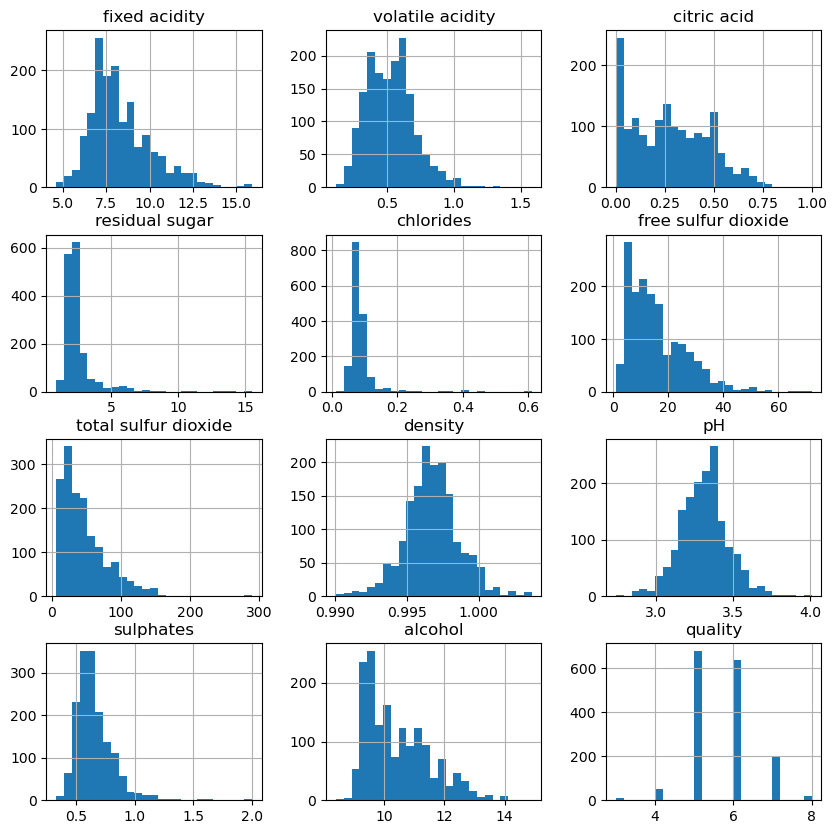

In [9]:
# All posible hist plots
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

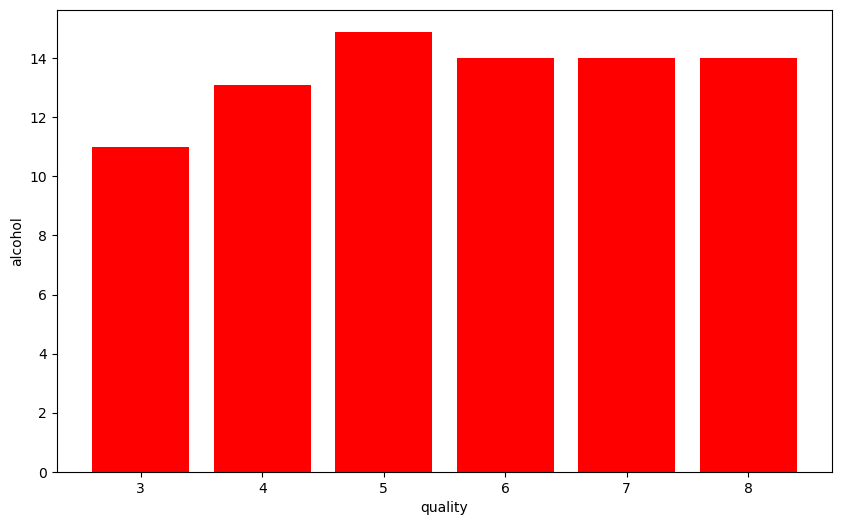

In [10]:
plt.figure(figsize=[10,6])

plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

<AxesSubplot:>

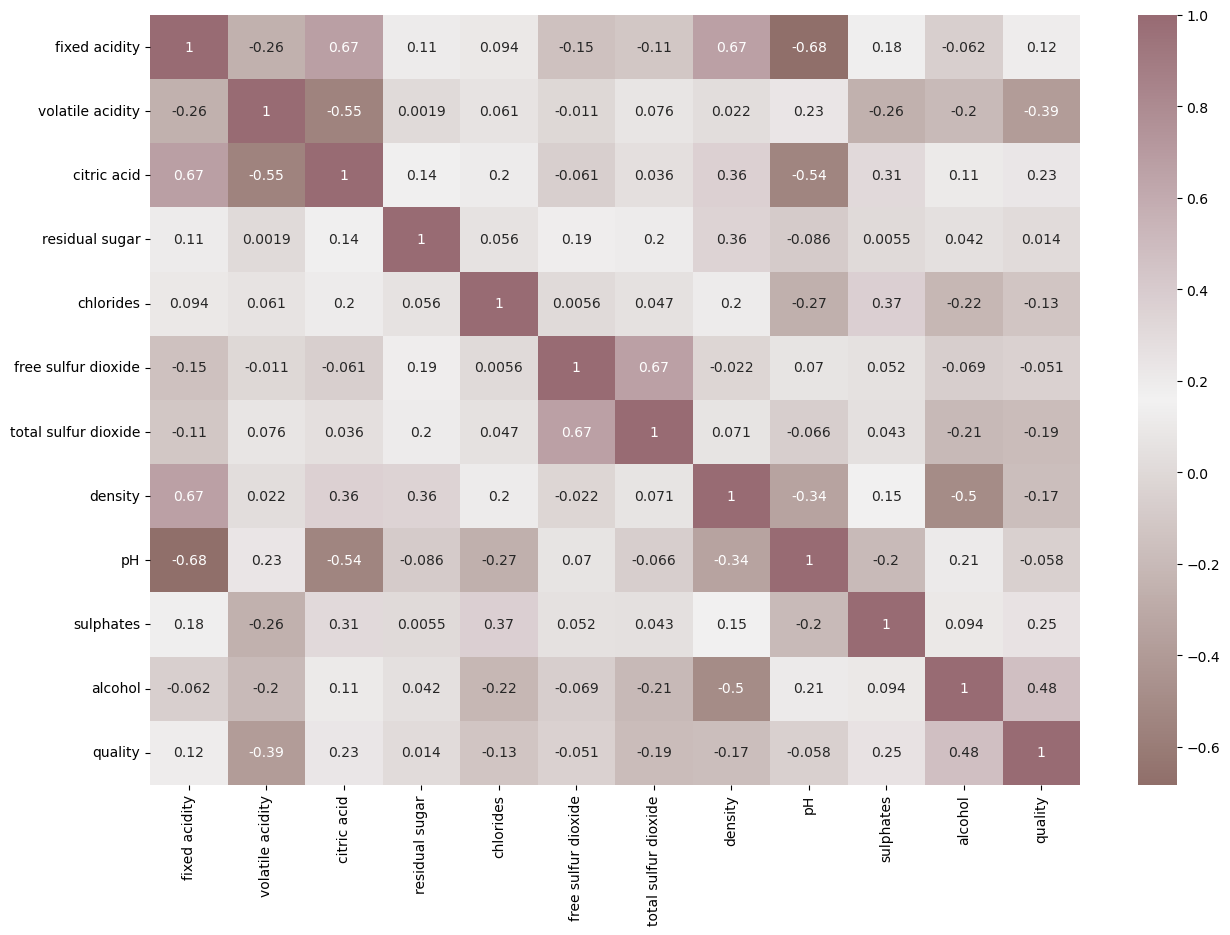

In [11]:
# Correlation matrix
corr=df.corr()
plt.subplots(figsize=(15,10))

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap=sns.diverging_palette(22,0,20,as_cmap=True))

In [12]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

In [13]:
# Seperate Feature variable and target variable
X=df.drop(['quality','goodquality'],axis=1)
y=df['goodquality']

In [14]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

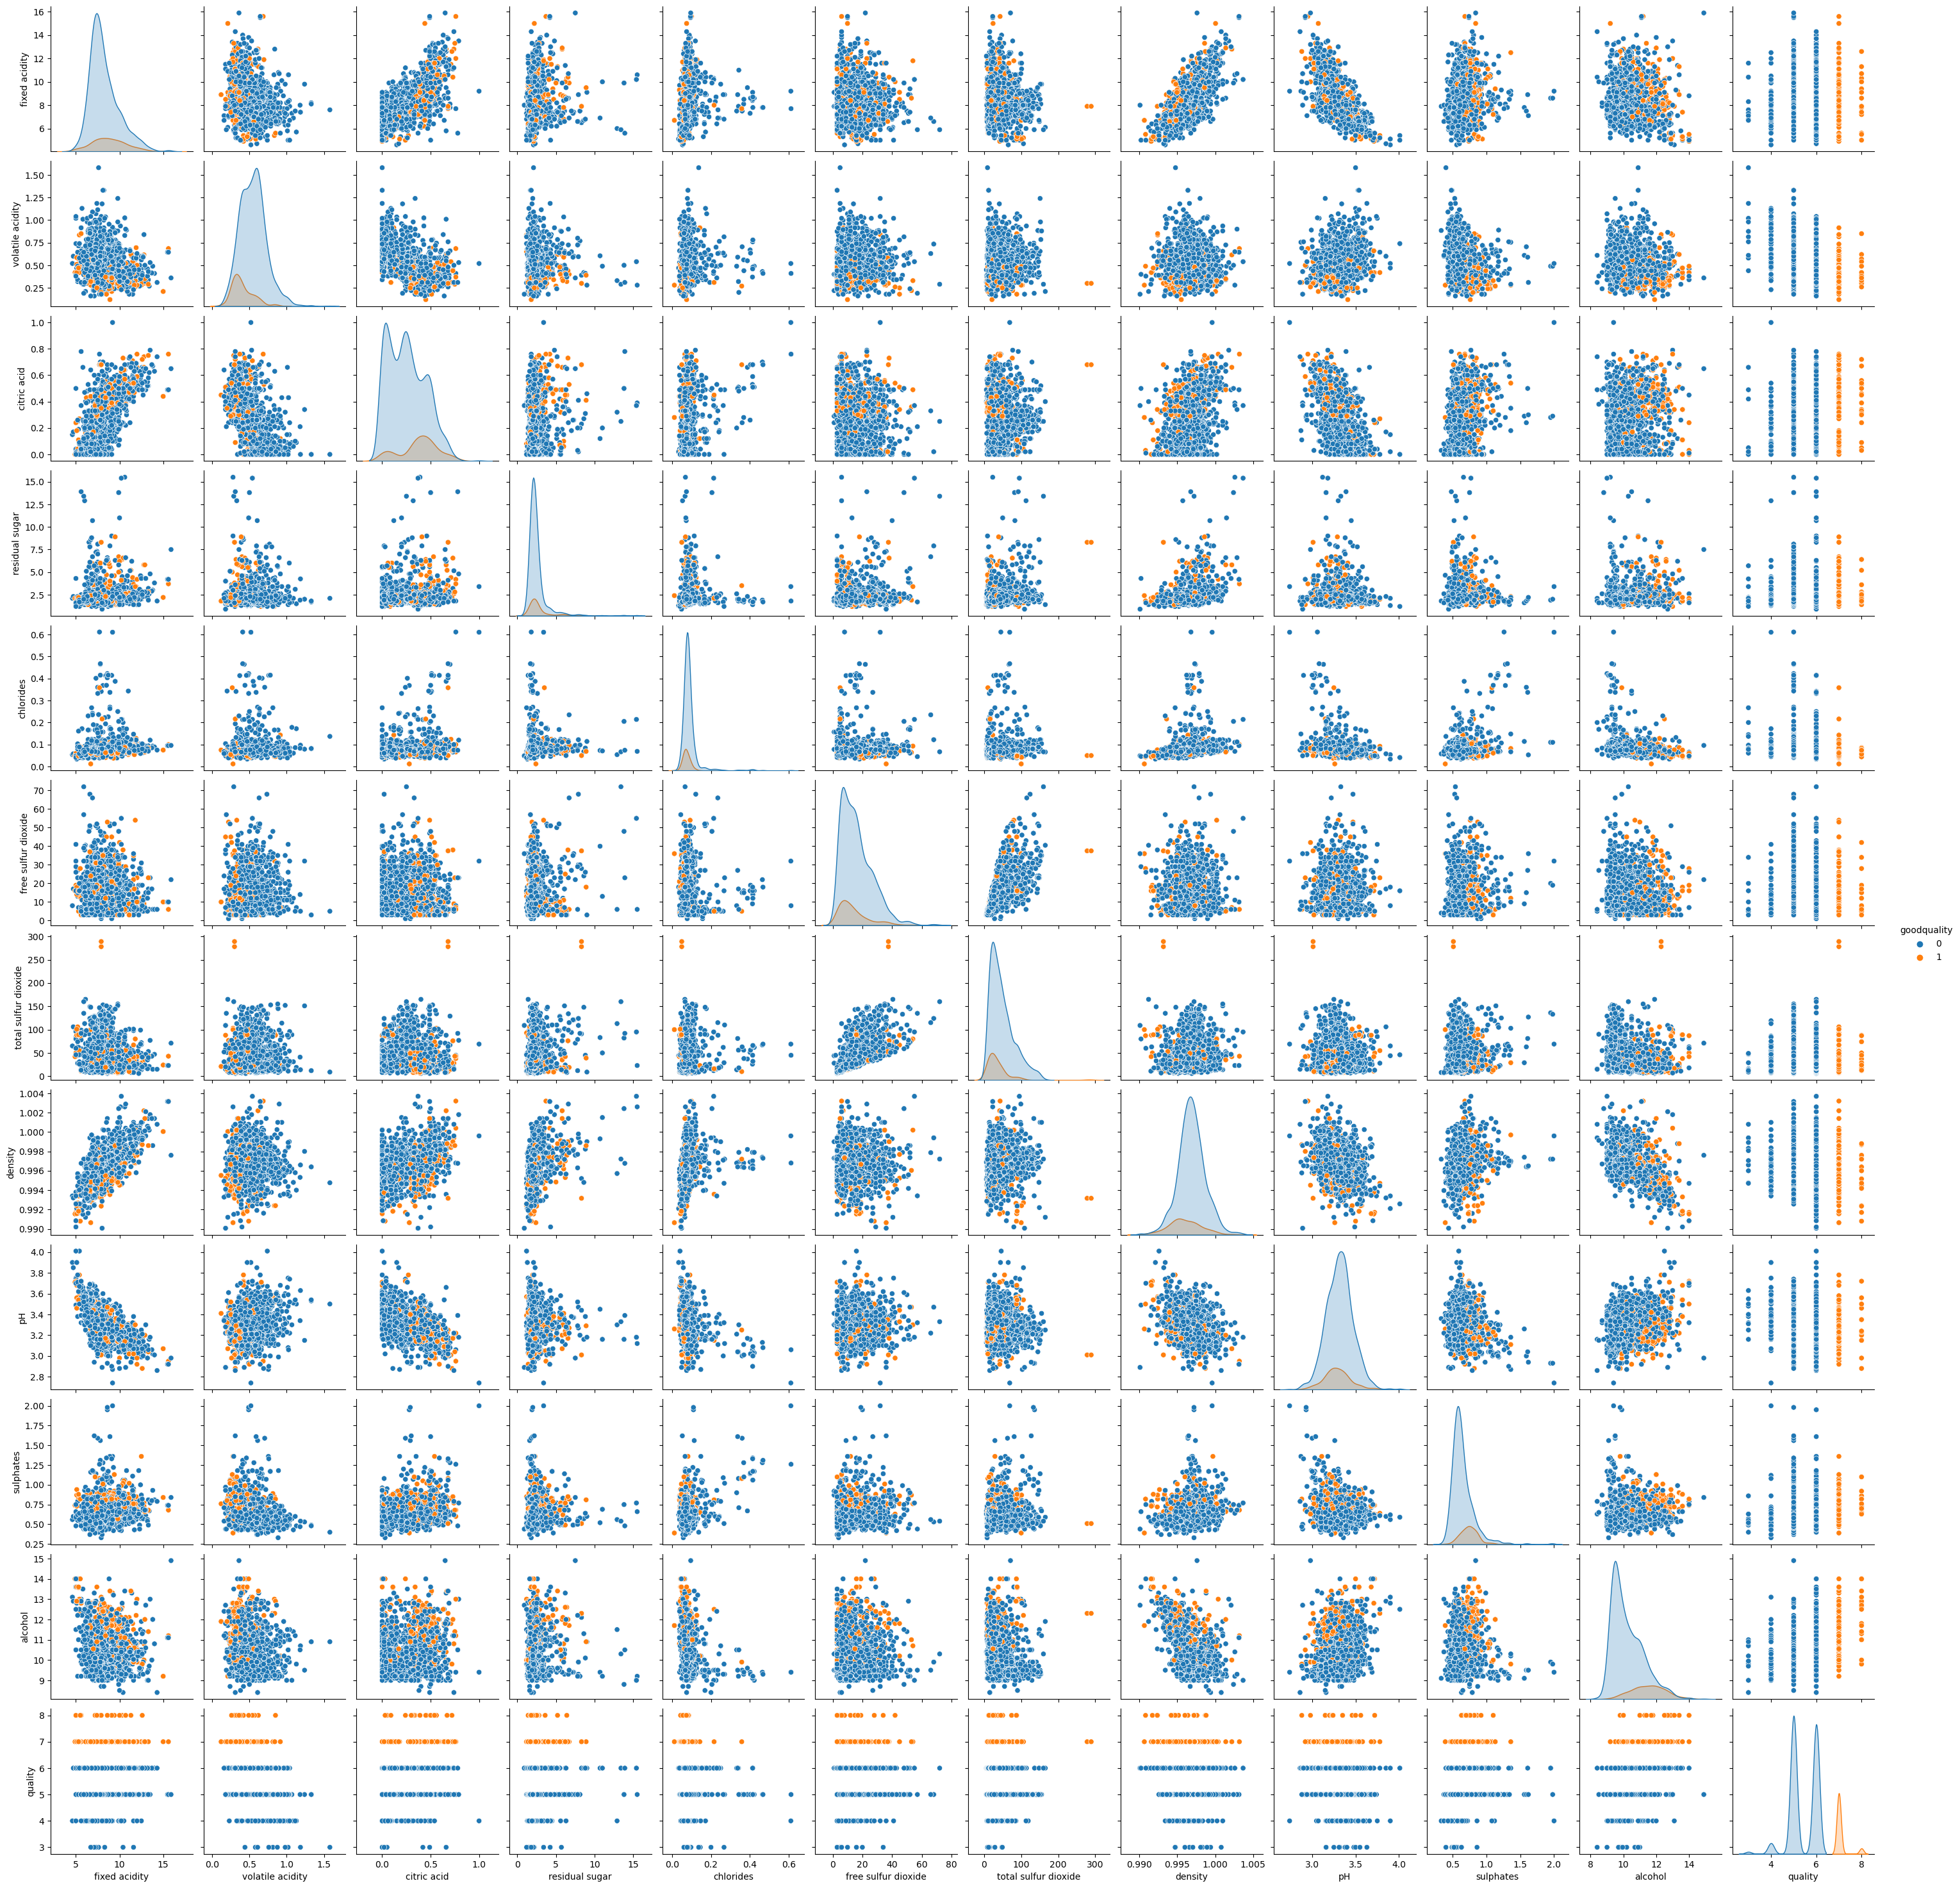

In [15]:
sns.pairplot(df, hue='goodquality')

By looking above distribution of data we select following algorithms:

* Decision Tree
* Random Forest
* AdaBoost
* Gradiand Boosting
* XGBoost

## Standardization Features

In [16]:
# Standardizing the feature variables
from sklearn.preprocessing import StandardScaler

X_feature=X
X=StandardScaler().fit_transform(X)

## Spliting and applying algorithms

In [17]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.25, random_state=0)

In [18]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
tree_pred=tree_model.predict(X_test)

print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [19]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(random_state=1)
RF_model.fit(X_train, y_train)
RF_pred=RF_model.predict(X_test)

print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



In [20]:
from sklearn.ensemble import AdaBoostClassifier

adbc_model=AdaBoostClassifier(random_state=1)
adbc_model.fit(X_train, y_train)
adbc_pred=adbc_model.predict(X_test)

print(classification_report(y_test, adbc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)
gbc_pred=gbc_model.predict(X_test)

print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.52      0.51      0.52        45

    accuracy                           0.89       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.89      0.89      0.89       400



In [22]:
from xgboost import XGBClassifier

XG_model=XGBClassifier(random_state=1)
XG_model.fit(X_train, y_train)
XG_pred=XG_model.predict(X_test)

print(classification_report(y_test, XG_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       355
           1       0.62      0.69      0.65        45

    accuracy                           0.92       400
   macro avg       0.79      0.82      0.80       400
weighted avg       0.92      0.92      0.92       400



## Finding Important Featues

<AxesSubplot:>

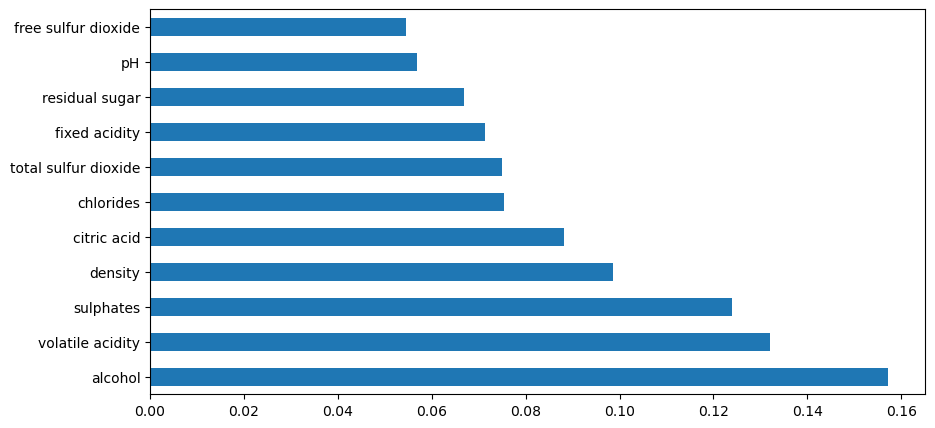

In [23]:
feature_importance=pd.Series(RF_model.feature_importances_,index=X_feature.columns)
feature_importance.nlargest(25).plot(kind='barh',figsize=(10,5))

<AxesSubplot:>

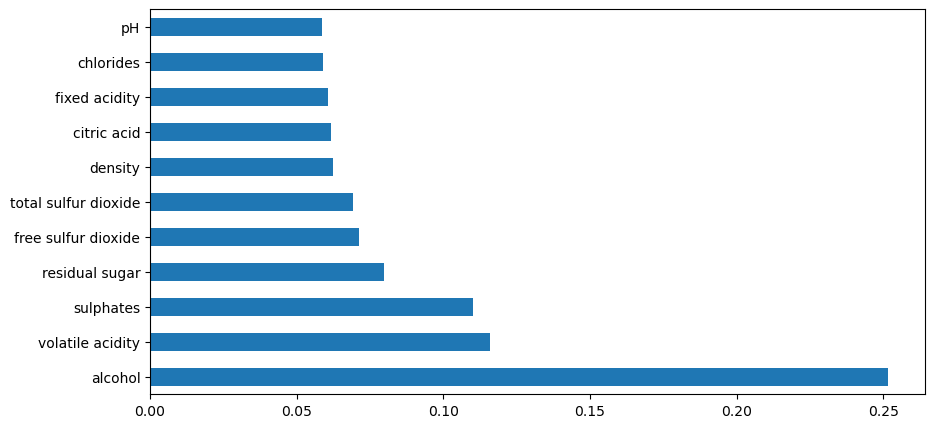

In [24]:
feature_importance=pd.Series(XG_model.feature_importances_,index=X_feature.columns)
feature_importance.nlargest(25).plot(kind='barh',figsize=(10,5))

In [25]:
import pickle

# Serialize and save the model to a file
with open('my_model.pkl', 'wb') as file:
    pickle.dump(XG_model, file)

#Load the serialized model from file

with open('my_model.pkl', 'rb') as file:
    
    loaded_model = pickle.load(file)

In [26]:
good_quality = df[df['quality']>=7]

In [28]:
good_quality.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
16            8.5              0.28         0.56             1.8      0.092   
37            8.1              0.38         0.28             2.1      0.066   
62            7.5              0.52         0.16             1.9      0.085   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
16                 35.0                 103.0   0.9969  3.30       0.75   
37                 13.0                  30.0   0.9968  3.23       0.73   
62                 12.0                  35.0   0.9968  3.38       0.62   

    alcohol  quality  goodquality  
7      10.0        7            1  
8       9.5        7            1  
16     10.5        7            1  
37      9.7        7            1  
62      9.5        7            1